In [347]:
# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [348]:
import glob
folders = glob.glob('D:\data\*')
txt_collection = []
for folder in folders:
    papertxt = glob.glob(folder + '\paper.txt')[0]
    txt_collection.append(papertxt)


In [349]:
line = 'abc123abc'
line = ''.join(i for i in line if not i.isdigit())
line

'abcabc'

In [402]:
import smart_open, os, glob
from smart_open import smart_open
from gensim.parsing.preprocessing import preprocess_documents
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import *

#for line in smart_open(txt_collection[0], 'rb'):
#    print(line)

CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords,
                 strip_non_alphanum,stem_text, lambda x: strip_short(x, minsize=2)]

document = ''
for line in smart_open(txt_collection[0], 'r', encoding='utf-8'):
    #line = line.decode("utf-8", "ignore")
    #line = line.decode('utf-8')
    line = line.strip('\r\n')
    if line.endswith('-'):
        line = line.strip('-')
    else:
        line = line+' '
    #line = line.strip('\r\n-')
    #line = line.replace(',', ' ')
    #line = line.replace('.', ' ')
    #line = line.replace(';', ' ')
    #line = line.lower()
    #line = ''.join(i for i in line if not i.isdigit())
    #print(line)
    document += line
#print(document)
preprocess_string(document, CUSTOM_FILTERS)

['composit',
 'scienc',
 'technolog',
 'composit',
 'scienc',
 'technolog',
 'www',
 'elsevi',
 'com',
 'locat',
 'compscitech',
 'reinforc',
 'mechan',
 'mwcnt',
 'ﬁlled',
 'polycarbon',
 'eitan',
 'fisher',
 'andrew',
 'brinson',
 'schadler',
 'materi',
 'scienc',
 'engin',
 'renssela',
 'polytechn',
 'institut',
 'troi',
 'ny',
 'usa',
 'depart',
 'mechan',
 'engin',
 'northwestern',
 'univers',
 'evanston',
 'il',
 'usa',
 'center',
 'appli',
 'energi',
 'research',
 'univers',
 'kentucki',
 'lexington',
 'ky',
 'usa',
 'receiv',
 'octob',
 'accept',
 'octob',
 'avail',
 'onlin',
 'decemb',
 'abstract',
 'ﬁller',
 'matrix',
 'interfac',
 'ﬁber',
 'reinforc',
 'polym',
 'composit',
 'critic',
 'control',
 'load',
 'transfer',
 'matrix',
 'ﬁber',
 'failur',
 'mechan',
 'degrad',
 'clear',
 'mechan',
 'load',
 'transfer',
 'tradit',
 'composit',
 'appli',
 'nanoﬁb',
 'ﬁlled',
 'polym',
 'paper',
 'focus',
 'understand',
 'reinforc',
 'mechan',
 'multiwal',
 'carbon',
 'nanotub',
 'mwc

In [403]:
from gensim.parsing.preprocessing import preprocess_documents
from gensim.parsing.preprocessing import preprocess_string

class MySentences(object):
    def __init__(self, txt_collection):
        self.txt_collection = txt_collection 
 
    def __iter__(self):
        for fname in self.txt_collection:
            document = ''
            for line in smart_open(fname, 'r', encoding='utf-8'):
                #line = line.strip(' \t\n-')
                #line = line.replace(',', ' ')
                #line = line.replace('.', ' ')
                #line = line.replace(';', ' ')
                #line = line.replace('*', ' ')
                #line = line.replace('(', ' ')
                #line = line.replace(')', ' ')
                #line = line.lower()
                #line = ''.join(i for i in line if not i.isdigit())
                line = line.strip('\r\n')
                if line.endswith('-'):
                    line = line.strip('-')
                else:
                    line = line+' '
                document += line
            document_list = preprocess_string(document, CUSTOM_FILTERS)
            #if 'succin' in document_list:
            #    print(document_list.count('succin'))
            yield document_list
            #l = preprocess_documents(document.split())
            #flat_list = [item for sublist in l for item in sublist]
            #yield flat_list

In [404]:
documents = MySentences(txt_collection) # a memory-friendly iterator
#print(len(list(documents)))

In [405]:
# generate the Word2Vec model
model = gensim.models.Word2Vec(documents, min_count=4, size=10)

2019-04-08 14:39:33,222 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-04-08 14:39:33,231 : INFO : collecting all words and their counts
2019-04-08 14:39:33,565 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-08 14:39:45,774 : INFO : collected 13219 word types from a corpus of 243894 raw words and 91 sentences
2019-04-08 14:39:45,777 : INFO : Loading a fresh vocabulary
2019-04-08 14:39:45,870 : INFO : effective_min_count=4 retains 4462 unique words (33% of original 13219, drops 8757)
2019-04-08 14:39:45,873 : INFO : effective_min_count=4 leaves 231455 word corpus (94% of original 243894, drops 12439)
2019-04-08 14:39:45,957 : INFO : deleting the raw counts dictionary of 13219 items
2019-04-08 14:39:45,961 : INFO : sample=0.001 downsamples 53 most-common words
2019-04-08 14:39:45,963 : INFO : downsampling leaves estimated 208860 word corpus (90.2% of prior 231455)
2019-04-08 14:39:46,006 : INFO : estimated requi

2019-04-08 14:40:42,635 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-08 14:40:42,637 : INFO : EPOCH - 5 : training on 243894 raw words (208818 effective words) took 11.1s, 18877 effective words/s
2019-04-08 14:40:42,639 : INFO : training on a 1219470 raw words (1044341 effective words) took 56.4s, 18531 effective words/s


In [406]:
print(model)
#print(model.wv.vocab)
model.wv.vocab['mwcnt']

model.save("word2vec-10.model")

2019-04-08 14:41:41,972 : INFO : saving Word2Vec object under word2vec-10.model, separately None
2019-04-08 14:41:41,977 : INFO : not storing attribute vectors_norm
2019-04-08 14:41:41,981 : INFO : not storing attribute cum_table
2019-04-08 14:41:42,056 : INFO : saved word2vec-10.model


Word2Vec(vocab=4462, size=10, alpha=0.025)


In [125]:
from tempfile import mkstemp

fs, temp_path = mkstemp("gensim_temp")  # creates a temp file

model.save(temp_path)  # save the model

2019-04-05 19:13:36,486 : INFO : saving Word2Vec object under C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp, separately None
2019-04-05 19:13:36,488 : INFO : not storing attribute vectors_norm
2019-04-05 19:13:36,490 : INFO : not storing attribute cum_table
2019-04-05 19:13:36,597 : INFO : saved C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp


In [126]:
new_model = gensim.models.Word2Vec.load(temp_path)  # open the model

2019-04-05 19:13:36,614 : INFO : loading Word2Vec object from C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp
2019-04-05 19:13:36,703 : INFO : loading wv recursively from C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp.wv.* with mmap=None
2019-04-05 19:13:36,705 : INFO : setting ignored attribute vectors_norm to None
2019-04-05 19:13:36,707 : INFO : loading vocabulary recursively from C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp.vocabulary.* with mmap=None
2019-04-05 19:13:36,709 : INFO : loading trainables recursively from C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp.trainables.* with mmap=None
2019-04-05 19:13:36,711 : INFO : setting ignored attribute cum_table to None
2019-04-05 19:13:36,713 : INFO : loaded C:\Users\dell\AppData\Local\Temp\tmpz8q6ve8ygensim_temp


In [127]:
print(new_model.wv.vocab)

{'composites': <gensim.models.keyedvectors.Vocab object at 0x0000020ECE81F710>, 'science': <gensim.models.keyedvectors.Vocab object at 0x0000020ECE81F208>, 'technology': <gensim.models.keyedvectors.Vocab object at 0x0000020ECE81F400>, 'www': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC898>, 'elsevier': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC710>, 'com': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC438>, 'locate': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC4E0>, 'compscitech': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC320>, 'reinforcement': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC3C8>, 'mechanisms': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC1D0>, 'mwcnt': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC828>, 'ﬁlled': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC5F8>, 'polycarbonate': <gensim.models.keyedvectors.Vocab object at 0x0000020ECF5BC7F0>

In [407]:
len(model.wv.vocab.keys())

4462

In [359]:
#visualize the model
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

def reduce_dimensions(model, plot_in_notebook = True, file='word-embedding-plot'):

    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []        # positions in vector space
    labels = []         # keep track of words to label our data again later
    #counter = 0
    for word in model.wv.vocab:
        vectors.append(model[word])
        labels.append(word)
        #counter +=1
        #if counter > 50:
        #    break


    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    logging.info('starting tSNE dimensionality reduction. This may take some time.')
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
        
    # Create a trace
    trace = go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='text',
        text=labels
        )
    
    data = [trace]
    
    logging.info('All done. Plotting.')
    
    if plot_in_notebook:
        init_notebook_mode(connected=True)
        #iplot(data, filename='word-embedding-plot')
        iplot(data, filename=file)
    else:
        #plot(data, filename='word-embedding-plot.html')
        plot(data, filename=file)


In [408]:
reduce_dimensions(model, plot_in_notebook = False, file='word-embedding-plot10.html')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

2019-04-08 14:42:22,136 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-04-08 14:45:25,779 : INFO : All done. Plotting.


In [368]:
from gensim.models import Word2Vec
model = Word2Vec.load("word2vec-35.model")

2019-04-08 13:04:28,618 : INFO : loading Word2Vec object from word2vec-35.model
2019-04-08 13:04:28,687 : INFO : loading wv recursively from word2vec-35.model.wv.* with mmap=None
2019-04-08 13:04:28,689 : INFO : setting ignored attribute vectors_norm to None
2019-04-08 13:04:28,691 : INFO : loading vocabulary recursively from word2vec-35.model.vocabulary.* with mmap=None
2019-04-08 13:04:28,693 : INFO : loading trainables recursively from word2vec-35.model.trainables.* with mmap=None
2019-04-08 13:04:28,695 : INFO : setting ignored attribute cum_table to None
2019-04-08 13:04:28,698 : INFO : loaded word2vec-35.model


In [369]:
print(model)

Word2Vec(vocab=4462, size=35, alpha=0.025)


In [409]:
model.most_similar(positive=['mwcnt'], topn=10)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

2019-04-08 14:46:27,978 : INFO : precomputing L2-norms of word weight vectors


[('mwnt', 0.9705913662910461),
 ('swnt', 0.9232368469238281),
 ('case', 0.9139854907989502),
 ('ﬁlling', 0.9097779989242554),
 ('pva', 0.9091997742652893),
 ('pristin', 0.9064666032791138),
 ('atbn', 0.9049633741378784),
 ('teo', 0.9027472734451294),
 ('concentr', 0.8983598947525024),
 ('wt', 0.8981085419654846)]

In [410]:
model.similarity('mwcnt', 'swcnt')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



0.8497178

In [411]:
model.similarity('pani', 'organo')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



0.9413942

In [412]:
filler_list = ['MWCNT', 'PANI-organoclay', 'Na-montmorillonite', 'SWCNT',
       'graphene platelet', 'graphene', 'graphene oxide', 'CLO30B', 'NAN',
       'SEP', 'SOMM100', 'SOMMEE', 'clay', 'organo-MMT', 'CaCO3',
       'silica', 'cellulose nanowhiskers',
       'butanol cellulose nanowhiskers',
       'surfactant cellulose nanowhiskers', 'surfactant', 'CNW',
       'PMMA-g-MWCNT', 'Na-MMT', 'PDMS-clay', 'montmorillonite', 'TiO2',
       'MMA-MWCNT', 'PMMA-g-expandable graphite', 'expandable graphite',
       'expanded graphite', 'graphite', 'ZrO2',
       'organo clay (Closite 20A)', 'PMMA-g-silica', 'titanium dioxide']

In [413]:
matrix_list = ['bisphenol A PC', 'EPDM', 'epoxy', 'SC-15 epoxy', 'DGEBA', 'PC',
       'PBAT', 'Ethylene vinyl acetate rubber', 'PVC', 'epoxy (Epon 815)',
       'epoxy (LY564)', 'PMMA', 'PLA', 'SAN', 'phenoxy',
       'epoxy (Epon 862', 'FPEOF', 'natural rubber', 'PP',
       'rigid PU foam', 'PC-SAN', 'polyamide',
       'waterborne UV-curable polyurethane', 'polyamide-6,6',
       'polyamide-6', 'polyimide', 'polybenzimidazole',
       'poly(vinyl alcohol)', 'Poly(2-hydroxyethyl acrylate)',
       'polyurethane', 'styrene butadiene rubber',
       'poly(butylene terephthalate)', 'poly(vinyl butyral)',
       'polybutylene succinate', 'bisphenol-A phthalonitrile']

In [414]:
word_vectors = model.wv
word_vectors.vectors.shape

(4462, 10)

In [415]:
filler_vectors = {}

for filler in filler_list:
    filler_vector = np.zeros((word_vectors.vectors.shape[1]))
    filler_words = preprocess_string(filler, CUSTOM_FILTERS)
    print(filler, filler_words)
    n_words = 0
    for word in filler_words:
        if word in word_vectors:
            n_words +=1
            filler_vector += word_vectors[word]
    if n_words > 0:
        filler_vector = filler_vector / n_words
    filler_vectors[filler]=filler_vector
            

MWCNT ['mwcnt']
PANI-organoclay ['pani', 'organoclai']
Na-montmorillonite ['na', 'montmorillonit']
SWCNT ['swcnt']
graphene platelet ['graphen', 'platelet']
graphene ['graphen']
graphene oxide ['graphen', 'oxid']
CLO30B ['clob']
NAN ['nan']
SEP ['sep']
SOMM100 ['somm']
SOMMEE ['somme']
clay ['clai']
organo-MMT ['organo', 'mmt']
CaCO3 ['caco']
silica ['silica']
cellulose nanowhiskers ['cellulos', 'nanowhisk']
butanol cellulose nanowhiskers ['butanol', 'cellulos', 'nanowhisk']
surfactant cellulose nanowhiskers ['surfact', 'cellulos', 'nanowhisk']
surfactant ['surfact']
CNW ['cnw']
PMMA-g-MWCNT ['pmma', 'mwcnt']
Na-MMT ['na', 'mmt']
PDMS-clay ['pdm', 'clai']
montmorillonite ['montmorillonit']
TiO2 ['tio']
MMA-MWCNT ['mma', 'mwcnt']
PMMA-g-expandable graphite ['pmma', 'expand', 'graphit']
expandable graphite ['expand', 'graphit']
expanded graphite ['expand', 'graphit']
graphite ['graphit']
ZrO2 ['zro']
organo clay (Closite 20A) ['organo', 'clai', 'closit']
PMMA-g-silica ['pmma', 'silica']


In [416]:
filler_vectors

{'MWCNT': array([ 0.55086416, -4.51871109,  1.6920799 ,  1.56675076,  0.42575949,
        -0.75069565, -1.20676959,  1.44917583,  0.25179839,  0.12424786]),
 'PANI-organoclay': array([-0.43800949, -1.8286491 ,  1.20080251,  0.88750005,  0.59499562,
         0.21101476,  0.22231548,  0.58128893, -0.23783574, -0.82252178]),
 'Na-montmorillonite': array([-0.78271002, -1.93688473,  0.86539462,  1.07374999,  0.69783625,
         0.35308173, -0.62549374, -0.09889354, -0.98820141, -0.40138971]),
 'SWCNT': array([-0.32910991, -1.86763716,  1.35645902,  0.74885857,  0.3345376 ,
        -0.18298559, -0.43751082,  0.41648161,  0.82546049, -0.88708031]),
 'graphene platelet': array([ 0.26536921, -1.83385324,  1.17463055,  1.20818263,  2.00783521,
         1.21362227, -0.55061544,  1.53515393, -2.04789037, -0.10040238]),
 'graphene': array([ 1.31299651, -1.72147596,  1.7397002 ,  1.49586642,  2.23058581,
         2.17566586, -0.20950468,  1.98398519, -3.15768814,  0.43581003]),
 'graphene oxide': a

In [387]:
def cosine_sim(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    
    return dot_product/(norm1*norm2)

In [448]:
cosine_sim(filler_vectors['MWCNT'], filler_vectors['SWCNT'] )

0.8408761807549645

In [418]:
import pickle

pickle_out = open("filler_vectors10.pickle","wb")
pickle.dump(filler_vectors, pickle_out)
pickle_out.close()

In [419]:
pickle_in = open("filler_vectors10.pickle","rb")
example_dict = pickle.load(pickle_in)

In [420]:
example_dict

{'MWCNT': array([ 0.55086416, -4.51871109,  1.6920799 ,  1.56675076,  0.42575949,
        -0.75069565, -1.20676959,  1.44917583,  0.25179839,  0.12424786]),
 'PANI-organoclay': array([-0.43800949, -1.8286491 ,  1.20080251,  0.88750005,  0.59499562,
         0.21101476,  0.22231548,  0.58128893, -0.23783574, -0.82252178]),
 'Na-montmorillonite': array([-0.78271002, -1.93688473,  0.86539462,  1.07374999,  0.69783625,
         0.35308173, -0.62549374, -0.09889354, -0.98820141, -0.40138971]),
 'SWCNT': array([-0.32910991, -1.86763716,  1.35645902,  0.74885857,  0.3345376 ,
        -0.18298559, -0.43751082,  0.41648161,  0.82546049, -0.88708031]),
 'graphene platelet': array([ 0.26536921, -1.83385324,  1.17463055,  1.20818263,  2.00783521,
         1.21362227, -0.55061544,  1.53515393, -2.04789037, -0.10040238]),
 'graphene': array([ 1.31299651, -1.72147596,  1.7397002 ,  1.49586642,  2.23058581,
         2.17566586, -0.20950468,  1.98398519, -3.15768814,  0.43581003]),
 'graphene oxide': a

In [421]:
pickle_in.close()

In [422]:
matrix_vectors = {}

for matrix in matrix_list:
    matrix_vector = np.zeros((word_vectors.vectors.shape[1]))
    matrix_words = preprocess_string(matrix, CUSTOM_FILTERS)
    print(matrix, matrix_words)
    n_words = 0
    for word in matrix_words:
        if word in word_vectors:
            n_words +=1
            matrix_vector += word_vectors[word]
    if n_words > 0:
        matrix_vector = matrix_vector / n_words
    matrix_vectors[matrix]=matrix_vector
#print('-------------------------------')
#for filler in filler_list:
#    filler_words = preprocess_string(filler, CUSTOM_FILTERS)
#    print(filler, filler_words)
matrix_vectors

bisphenol A PC ['bisphenol', 'pc']
EPDM ['epdm']
epoxy ['epoxi']
SC-15 epoxy ['sc', 'epoxi']
DGEBA ['dgeba']
PC ['pc']
PBAT ['pbat']
Ethylene vinyl acetate rubber ['ethylen', 'vinyl', 'acet', 'rubber']
PVC ['pvc']
epoxy (Epon 815) ['epoxi', 'epon']
epoxy (LY564) ['epoxi', 'ly']
PMMA ['pmma']
PLA ['pla']
SAN ['san']
phenoxy ['phenoxi']
epoxy (Epon 862 ['epoxi', 'epon']
FPEOF ['fpeof']
natural rubber ['natur', 'rubber']
PP ['pp']
rigid PU foam ['rigid', 'pu', 'foam']
PC-SAN ['pc', 'san']
polyamide ['polyamid']
waterborne UV-curable polyurethane ['waterborn', 'uv', 'curabl', 'polyurethan']
polyamide-6,6 ['polyamid']
polyamide-6 ['polyamid']
polyimide ['polyimid']
polybenzimidazole ['polybenzimidazol']
poly(vinyl alcohol) ['poli', 'vinyl', 'alcohol']
Poly(2-hydroxyethyl acrylate) ['poli', 'hydroxyethyl', 'acryl']
polyurethane ['polyurethan']
styrene butadiene rubber ['styren', 'butadien', 'rubber']
poly(butylene terephthalate) ['poli', 'butylen', 'terephthal']
poly(vinyl butyral) ['poli', 

{'bisphenol A PC': array([ 0.19254186, -1.63254824,  1.65980744,  1.34189341,  0.17859112,
         0.38662618,  1.01789029,  0.15182979,  0.12017697, -0.49324986]),
 'EPDM': array([-0.61325181, -2.00965095,  1.65668488,  1.27910805,  0.62848037,
         0.00298446,  0.35616291,  0.47969103,  0.24446543, -1.15096569]),
 'epoxy': array([ 1.52049184, -3.90701342,  3.07330513,  0.0843989 ,  2.35595798,
         0.42000118,  1.33304811,  1.3662672 , -1.37882268,  0.88977653]),
 'SC-15 epoxy': array([ 0.70005244, -2.18085974,  2.32401186,  0.27812884,  1.54064429,
         0.16593077,  0.77047026,  0.75336398, -0.96667758,  0.17000002]),
 'DGEBA': array([-0.09600299, -0.28693527,  0.44168127,  0.12781978,  0.10768621,
        -0.02791941, -0.29781774, -0.02223026, -0.17410693, -0.31919357]),
 'PC': array([ 0.31046706, -2.84972262,  2.11279631,  2.45332575, -0.28202781,
         0.75617921,  2.4311583 ,  0.24069124,  1.00844741, -0.48942995]),
 'PBAT': array([-0.82806438, -3.30043149,  1.34

In [423]:
pickle_out = open("matrix_vectors10.pickle","wb")
pickle.dump(matrix_vectors, pickle_out)
pickle_out.close()

In [338]:
for vector in filler_vectors.items():
    print(vector)

('MWCNT', array([ 0.00860113, -1.03260005,  0.64588594,  0.47779787,  0.24385948,
       -0.06062395, -0.68371701,  0.2689622 , -0.22832523, -0.153621  ,
       -0.66910374, -0.30577415, -0.89125711,  0.1151796 ,  0.45576879,
       -0.14298658, -0.34224951, -0.33557743,  0.15413769, -0.72306806,
        0.20277208, -0.23277667, -0.07035992, -0.46789309, -0.21163905,
        0.20147236, -0.27588403,  0.40615338, -0.18357557, -0.41297618,
       -0.13048166, -0.93967432, -0.15458161, -0.28475532,  0.48509288,
        0.98409057,  0.93000638,  0.47202432, -0.17727551, -0.02319303,
       -1.60362697, -0.03539341, -0.10192662,  0.48451814, -0.16315909,
        0.07069767, -0.31977886,  0.5023858 ,  0.77217191, -0.34890571,
        0.11122582,  0.03634916,  1.03076053,  0.18434379, -0.92971528,
       -0.51226813,  0.49450997, -0.18413666, -0.46274212,  0.19861196,
       -0.47976661,  0.68759608,  0.87635547, -0.51680321,  0.14155737,
       -0.34496355,  0.17161381,  1.08704722, -0.14455

In [426]:
#visualize the fillers and matrices
def reduce_dimensions_dicts(dicts, plot_in_notebook = True, file = 'filler-matrix-word-embedding-plot'):

    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []        # positions in vector space
    labels = []         # keep track of words to label our data again later

    for vector_dict in dicts:
        for word, vector in vector_dict.items():
            vectors.append(vector)
            labels.append(word)



    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    logging.info('starting tSNE dimensionality reduction. This may take some time.')
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
        
    # Create a trace
    trace = go.Scatter(
        x=x_vals,
        y=y_vals,
        #mode='text',
        #text=labels
        mode='markers',
        #text=labels
        )
    
    data = [trace]
    
    logging.info('All done. Plotting.')
    
    if plot_in_notebook:
        init_notebook_mode(connected=True)
        #iplot(data, filename='filler-matrix-word-embedding-plot-dot')
        iplot(data, filename=file)
    else:
        #plot(data, filename='filler-matrix-word-embedding-plot-dot.html')
        plot(data, filename=file)


In [427]:
reduce_dimensions_dicts([matrix_vectors, filler_vectors], plot_in_notebook = False, file='filler-matrix-word-embedding-plot-dot10.html')

2019-04-08 14:50:02,386 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-04-08 14:50:03,695 : INFO : All done. Plotting.


In [401]:
word_vectors.vectors.shape

(4462, 35)

In [429]:
model

In [430]:
pickle_in = open("filler_vectors.pickle","rb")
filler_vectors = pickle.load(pickle_in)
pickle_in.close()
filler_vectors

{'MWCNT': array([ 0.00860113, -1.03260005,  0.64588594,  0.47779787,  0.24385948,
        -0.06062395, -0.68371701,  0.2689622 , -0.22832523, -0.153621  ,
        -0.66910374, -0.30577415, -0.89125711,  0.1151796 ,  0.45576879,
        -0.14298658, -0.34224951, -0.33557743,  0.15413769, -0.72306806,
         0.20277208, -0.23277667, -0.07035992, -0.46789309, -0.21163905,
         0.20147236, -0.27588403,  0.40615338, -0.18357557, -0.41297618,
        -0.13048166, -0.93967432, -0.15458161, -0.28475532,  0.48509288,
         0.98409057,  0.93000638,  0.47202432, -0.17727551, -0.02319303,
        -1.60362697, -0.03539341, -0.10192662,  0.48451814, -0.16315909,
         0.07069767, -0.31977886,  0.5023858 ,  0.77217191, -0.34890571,
         0.11122582,  0.03634916,  1.03076053,  0.18434379, -0.92971528,
        -0.51226813,  0.49450997, -0.18413666, -0.46274212,  0.19861196,
        -0.47976661,  0.68759608,  0.87635547, -0.51680321,  0.14155737,
        -0.34496355,  0.17161381,  1.08704

In [431]:
pickle_in = open("matrix_vectors.pickle","rb")
matrix_vectors = pickle.load(pickle_in)
pickle_in.close()
matrix_vectors

{'bisphenol A PC': array([ 0.09760512, -0.49285525,  0.59907046,  0.4076535 ,  0.13687227,
         0.12928449,  0.20651953,  0.30990215, -0.0189062 , -0.10556737,
        -0.2214813 ,  0.31907384, -0.50495017, -0.20957507,  0.46442664,
         0.15363452, -0.1887982 , -0.30010779, -0.01194632, -0.28905727,
         0.18882926,  0.14452246, -0.09500518, -0.43336631,  0.00659299,
         0.01451863,  0.12846256,  0.74215376,  0.16430452, -0.10531601,
         0.25095334, -0.42087046, -0.10003082, -0.27160406,  0.57401547,
         0.17363901,  0.55069061,  0.34632709, -0.24522626,  0.09868017,
        -0.51648107, -0.0317466 ,  0.09448896,  0.27004605, -0.09130323,
        -0.04755371,  0.04575628,  0.48298648,  0.46183506, -0.44878054,
         0.20680645,  0.22214416,  0.51773886,  0.06355288, -0.22401156,
        -0.30891807,  0.16428882, -0.12187406, -0.25870324,  0.2862826 ,
        -0.10383948,  0.21391399,  0.33919187, -0.10157377, -0.03578883,
        -0.60724143, -0.05469615,

In [432]:
reduce_dimensions_dicts([matrix_vectors, filler_vectors], plot_in_notebook=False, file = 'filler-matrix-word-embedding-plot-dot.html')

2019-04-10 15:54:26,883 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-04-10 15:54:28,516 : INFO : All done. Plotting.


In [449]:
import pandas as pd
import numpy as np
df_filler_sim = pd.DataFrame(index=filler_list, columns=filler_list, dtype=np.float64)

for word1 in filler_list:
    for word2 in filler_list:
        df_filler_sim.loc[word1, word2] = cosine_sim(filler_vectors[word1], filler_vectors[word2] )

In [450]:
df_filler_sim

,MWCNT,PANI-organoclay,Na-montmorillonite,SWCNT,graphene platelet,graphene,graphene oxide,CLO30B,NAN,SEP,...,TiO2,MMA-MWCNT,PMMA-g-expandable graphite,expandable graphite,expanded graphite,graphite,ZrO2,organo clay (Closite 20A),PMMA-g-silica,titanium dioxide
MWCNT,1.000000,0.852540,0.799169,0.840876,0.689263,0.557011,0.513714,0.804555,0.722145,0.716485,...,0.906375,0.950454,0.754845,0.528150,0.528150,0.454323,0.741216,0.877900,0.887148,0.481648
PANI-organoclay,0.852540,1.000000,0.909690,0.898812,0.719556,0.571741,0.570394,0.957004,0.956047,0.958074,...,0.828793,0.888078,0.863356,0.688201,0.688201,0.538296,0.930116,0.906494,0.852999,0.739487
Na-montmorillonite,0.799169,0.909690,1.000000,0.749737,0.787886,0.645102,0.692051,0.942288,0.885629,0.861926,...,0.811334,0.905772,0.862154,0.786828,0.786828,0.676107,0.897648,0.922923,0.783671,0.795193
SWCNT,0.840876,0.898812,0.749737,1.000000,0.489813,0.303946,0.283818,0.860126,0.860216,0.875444,...,0.666915,0.828447,0.596660,0.382203,0.382203,0.194339,0.724385,0.750133,0.724672,0.572478
graphene platelet,0.689263,0.719556,0.787886,0.489813,1.000000,0.965037,0.943378,0.763478,0.712258,0.632612,...,0.757245,0.724678,0.887289,0.892284,0.892284,0.866406,0.778866,0.802282,0.711152,0.717120
graphene,0.557011,0.571741,0.645102,0.303946,0.965037,1.000000,0.962999,0.597831,0.568543,0.472756,...,0.675848,0.575340,0.835712,0.860473,0.860473,0.879257,0.699637,0.671988,0.623722,0.633935
graphene oxide,0.513714,0.570394,0.692051,0.283818,0.943378,0.962999,1.000000,0.629201,0.592121,0.506040,...,0.609478,0.602391,0.845458,0.939014,0.939014,0.943499,0.713629,0.634508,0.555857,0.735851
CLO30B,0.804555,0.957004,0.942288,0.860126,0.763478,0.597831,0.629201,1.000000,0.964435,0.955270,...,0.752099,0.878370,0.828609,0.731723,0.731723,0.582580,0.893204,0.888252,0.768341,0.788905
NAN,0.722145,0.956047,0.885629,0.860216,0.712258,0.568543,0.592121,0.964435,1.000000,0.986597,...,0.678829,0.788432,0.801686,0.712367,0.712367,0.532306,0.920022,0.809591,0.703843,0.850583
SEP,0.716485,0.958074,0.861926,0.875444,0.632612,0.472756,0.506040,0.955270,0.986597,1.000000,...,0.665892,0.786360,0.770909,0.659845,0.659845,0.472882,0.902728,0.792341,0.697956,0.806443


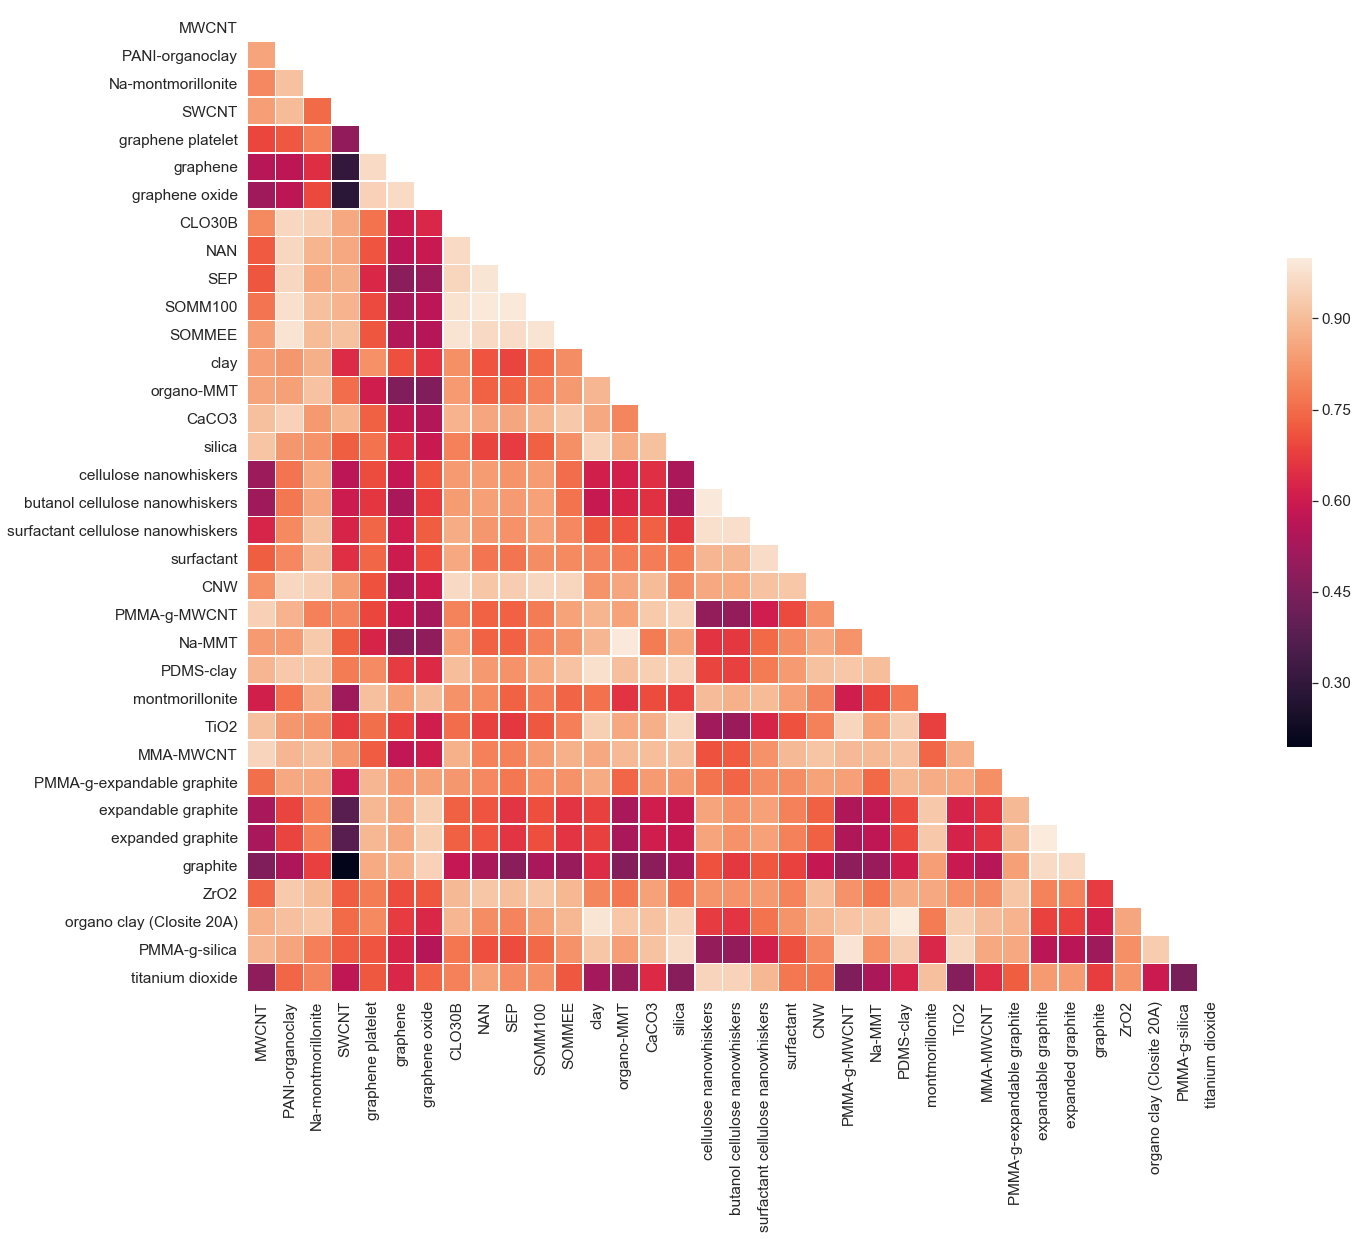

In [465]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.4)
# Generate a mask for the upper triangle
mask = np.zeros_like(df_filler_sim, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_filler_sim, mask=mask, linewidths=.5, cbar_kws={"shrink": .5},
            square=True)

In [466]:
import pandas as pd
import numpy as np
df_matrix_sim = pd.DataFrame(index=matrix_list, columns=matrix_list, dtype=np.float64)

for word1 in matrix_list:
    for word2 in matrix_list:
        df_matrix_sim.loc[word1, word2] = cosine_sim(matrix_vectors[word1], matrix_vectors[word2] )

In [468]:
df_matrix_sim.to_csv('df_matrix_sim.csv')

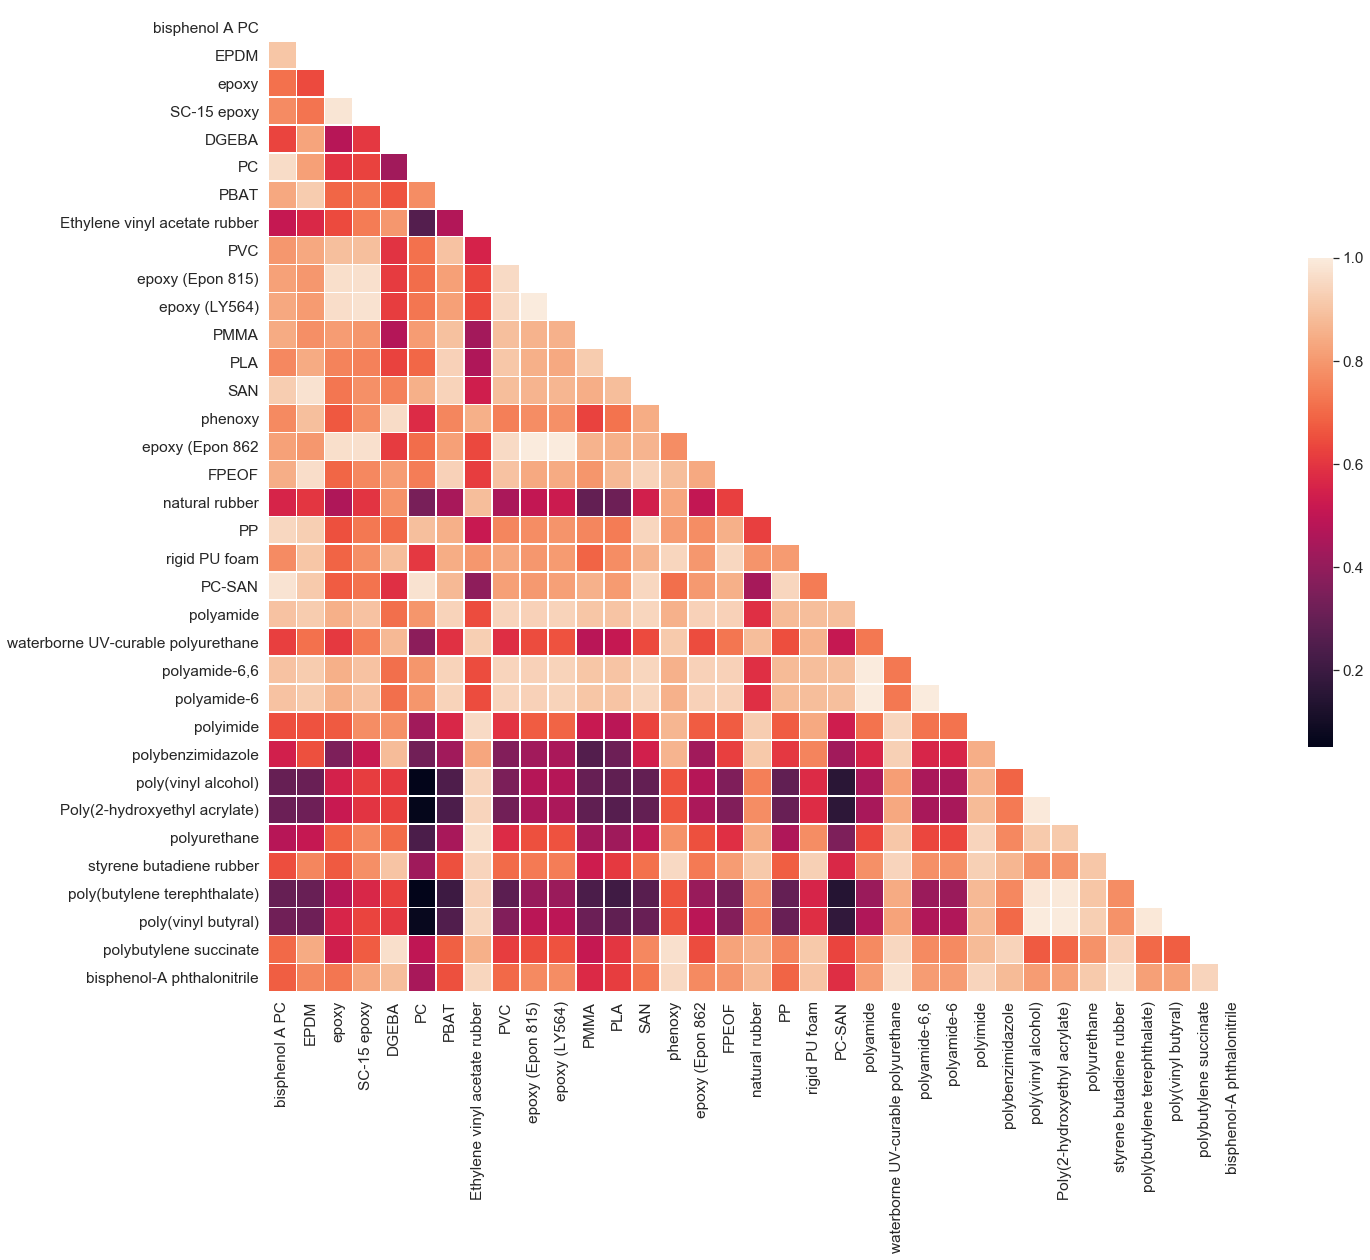

In [469]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.4)
# Generate a mask for the upper triangle
mask = np.zeros_like(df_matrix_sim, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_matrix_sim, mask=mask, linewidths=.5, cbar_kws={"shrink": .5},
            square=True)